In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
def calculate_stacking(sequence):
    # Dictionary to map nucleotide pairs to their respective stacking values
    stacking_map = {
        'AA': -12,
        'AT': -10.6,
        'TA': -11.2,
        'AG': -11.5,
        'GA': -11.4,
        'TT': -12,
        'AC': -11.8,
        'CA': -12.3,
        'TG': -12.3,
        'GT': -11.8,
        'TC': -11.4,
        'CT': -11.5,
        'CC': -9.5,
        'CG': -13.1,
        'GC': -13.2,
        'GG': -9.5,
    }
    
    size = len(sequence)
    list_stacking = []
    
    for pos in range(size-1):
        nucleotide_pair = sequence.upper()[pos:pos+2]
        stacking = stacking_map.get(nucleotide_pair, None)
        
        if stacking is not None:
            list_stacking.append(stacking)
    
    return list_stacking

def create_dataframe(file_path):
    # Read the contents of the file
    with open(file_path) as f:
        sequence = f.read()

    # Calculate the stacking values for the sequence
    list_stacking = calculate_stacking(sequence)

    # Calculate the number of rows and columns needed
    num_rows = (len(list_stacking) - 1) // 99 + 1
    num_cols = min(len(list_stacking), 99)

    # Create a 2D numpy array with NaN values to represent the DataFrame
    data_array = np.full((num_rows, num_cols), np.nan)

    # Fill the data_array with the stacking values
    for i, val in enumerate(list_stacking):
        row = i // 99
        col = i % 99
        data_array[row, col] = val

    # Create the DataFrame with 99 columns
    df_sequence = pd.DataFrame(data_array, columns=range(1, num_cols + 1))

    return df_sequence


file_path = r"D:\Sequences 80-20\Sequences_80-20_sequences Chlamydia pneumoniae.txt"

# Create the dataframe containing the stacking values for the given sequence
df_stacking = create_dataframe(file_path)

# Generate a list of column names
new_columns = list(range(-80, 19))
df_stacking.columns = new_columns
df_stacking.reset_index(drop=True, inplace=True)

# Display the dataframe
df_stacking


,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
0,-13.2,-13.1,-9.5,-9.5,-11.4,-11.5,-11.4,-10.6,-11.2,-12.0,...,-10.6,-12.0,-12.0,-12.0,-12.3,-11.4,-10.6,-12.0,-12.0,-11.2
1,-9.5,-12.3,-10.6,-11.2,-11.8,-9.5,-11.5,-11.2,-11.5,-13.2,...,-10.6,-12.3,-11.8,-12.3,-11.8,-12.0,-12.0,-12.3,-11.4,-10.6
2,-11.5,-11.2,-10.6,-12.0,-12.0,-12.0,-12.0,-12.0,-11.2,-12.0,...,-11.2,-10.6,-12.0,-11.4,-9.5,-11.5,-11.4,-11.5,-12.0,-11.2
3,-11.5,-11.8,-12.3,-11.8,-12.0,-11.4,-11.5,-11.2,-10.6,-12.0,...,-11.4,-11.5,-9.5,-9.5,-11.4,-12.0,-12.0,-12.0,-12.0,-12.0
4,-12.0,-11.2,-12.0,-11.5,-11.4,-11.5,-11.4,-12.0,-12.0,-11.5,...,-12.0,-12.0,-12.0,-10.6,-11.4,-12.3,-12.0,-12.0,-11.5,-11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-9.5,-11.5,-12.3,-11.8,-11.2,-10.6,-12.0,-12.3,-11.4,-12.0,...,-11.8,-12.3,-11.8,-12.0,-12.0,-12.3,-9.5,-9.5,-13.2,-12.3
400,-10.6,-12.3,-11.4,-12.0,-10.6,-11.4,-9.5,-11.5,-11.2,-11.5,...,-12.3,-11.8,-11.2,-11.8,-13.1,-9.5,-11.8,-11.4,-13.1,-9.5
401,-11.5,-12.0,-12.0,-12.0,-12.0,-11.2,-10.6,-12.0,-12.0,-12.0,...,-13.1,-9.5,-9.5,-9.5,-11.4,-11.5,-13.2,-9.5,-12.3,-12.0
402,-12.0,-11.8,-12.3,-12.0,-11.5,-9.5,-11.4,-12.0,-12.0,-11.8,...,-12.0,-10.6,-11.4,-11.5,-11.4,-13.1,-11.4,-11.8,-12.3,-12.0


In [3]:
for_line= pd.DataFrame(df_stacking.mean())
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

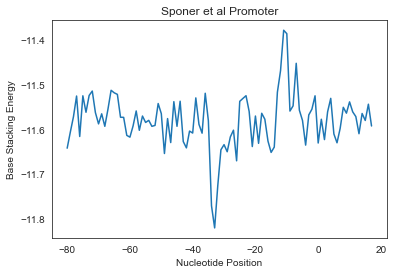

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Base Stacking Energy", title='Sponer et al Promoter')

# show the plot
plt.show()